공분산: -44.92
상관계수: -0.96
P-value: 0.00001
                            OLS Regression Results                            
Dep. Variable:               bir_rate   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     93.25
Date:                Fri, 22 Nov 2024   Prob (F-statistic):           1.10e-05
Time:                        15:23:22   Log-Likelihood:                -21.544
No. Observations:                  10   AIC:                             47.09
Df Residuals:                       8   BIC:                             47.69
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const  

C:\Users\user\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


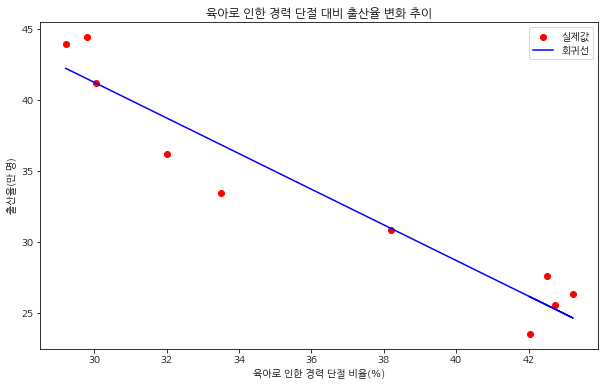

1.3855583347321953e-14


In [1]:
# 육아로 인한 경력단절 비율 대비 출산율 변동 

import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as stats
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

data2 = {
    'career_break': [29.21, 29.81, 30.04, 32, 33.51, 38.2, 42.5, 43.23, 42.73, 42.03],  # 육아로 인한 경력단절 (단위: %)
    'bir_rate': [43.9, 44.4, 41.2, 36.2, 33.4, 30.8, 27.6, 26.3, 25.5, 23.5]   # 출생율 (단위: 만명)
}

df2 = pd.DataFrame(data2)

x= df2['career_break']
y = df2['bir_rate']

# 상관계수, 공분산 - 두 변수 상관 정도 + p-value
print('공분산: {:.2f}'.format(np.cov(x,y)[0,1])) # -48.53

print('상관계수: {:.2f}'.format(stats.pearsonr(x,y)[0])) # -0.9

# -1 < (상관계수) < 1 
# => 1에 가까울 수록 강한 양의 상관관계
# => -1에 가까울 수록 강한 음의 상관관계
print('P-value: {:.5f}'.format(stats.pearsonr(x,y)[1])) # 0.0003

# 가설 검증
x2= sm.add_constant(x) # 절편 만들기 

m2 = sm.OLS(y, x2).fit()

print(m2.summary())

# 한글 폰트
font_path='NanumGothic.ttf' 
font_name=font_manager.FontProperties(fname=font_path).get_name()
rc('font',family=font_name) 

# 시각화
plt.figure(figsize=(10,6))
plt.scatter(df2['career_break'], df2['bir_rate'], color='red', label='실제값')
plt.plot(df2['career_break'], m2.fittedvalues, color='blue', label='회귀선')
plt.xlabel('육아로 인한 경력 단절 비율(%)')
plt.ylabel('출산율(만 명)')
plt.title('육아로 인한 경력 단절 대비 출산율 변화 추이')
plt.savefig('육아로 인한 경력단절 대비 출산율 변화 추이.jpg')
plt.legend()
plt.show()

# 가설검증 관련 필수 포함 내용
# 잔차의 평균은 1.3855583347321953e-14로 0에 가깝고, 
# 결정계수(R-Squared) : 0.921 로 0.7보다 크기 때문에 해당 회귀식 신뢰도가 높다
# 상관계수는 -0.96 로 강한 음의 상관성을 띈다 
# p-value는 0.000011 이므로 p < 0.05 이기 때문에 영가설 기각, 대립가설 채택
# 따라서, 육아로 인한 경력단절 비율이 오를수록, 출산 정도가 약 1만 2천명씩 감소한다

# 잔차의 평균

residuals = y - m2.fittedvalues
print(residuals.mean()) 
